In [2]:
import OffsetArrays
using Plots
using Revise
using StatsBase
using ProgressMeter
using SparseArrays, LinearAlgebra, IndexedGraphs, Graphs
using Distributions
srcpath = "../src"
include("$srcpath/single_instance.jl")

build_real_graph (generic function with 1 method)

In [3]:
# S=0   I=1
# The times go from ti = 0 to ti=T+1
# when ti=0 it means that i is the zero patient
# when ti=T+1 it means that i is never infected

λp = 0.99# planted infection rate
λi = 0.99 #inferred infection rate

infer_lam = false #set it true if you want to infere the prior parameter λ
infer_gam = false #set it true if you want to infere the prior parameter γ


T = 8 # discrete time


Ngraph = 2000;
dilution = 0.0
fr = 0.0;


In [4]:
degree_dist = Dirac(3);

In [6]:
x = zeros(Int,Ngraph, T + 1) 
tol = 1e-2
maxit = 200
function printstate(t,err,f)
    println("iter=$t, err=$(err)")
end
γRange = LinRange(0.005,0.05,25)
tot_iters = zeros(length(γRange))
totst = 1
for st in 1:length(γRange)
    for samp = 1:totst
        # for every iteration we initialize a new graph
        G = makeGraph(Ngraph,degree_dist)
        γi = γp = γRange[st] 
        # we sample an epidemic
        sample!(x, G, λp, γp)
        # observations set in the form of 
        # [(individual,state,observation time, false_rate of the test)]
        # where state ∈ {0,1} respectively for S and I
        # The reason why there is a T+1 is that sibyl starts from time 1 to time T. 
        # Instead the ensemble goes from time 0 to time T  
        O = [(i,Bool(x[i,T+1]),T+1,1e-10) for i = 1:Int(round(Ngraph * (1 - dilution)))]
        O = [rand() > fr ? (o[1],o[2],o[3],fr) : (o[1],!o[2],o[3],fr) for o in O]
        function saveiters(t,err,f)
            if err < tol || t == maxit-1
                tot_iters[st] += t 
            end
        end
        #we now run the BP algorithm for the single instance defined above
        sibyl(Ngraph, T+1, G, O,  γi , λi; maxit = maxit, tol = tol, callback=saveiters);
    end
end
tot_iters ./= totst

25-element Vector{Float64}:
 199.0
 199.0
  35.0
   8.0
  30.0
   7.0
   7.0
   7.0
   7.0
   7.0
   6.0
   6.0
   6.0
   6.0
   6.0
   6.0
   6.0
   6.0
   6.0
   6.0
   6.0
   5.0
   5.0
   5.0
   5.0

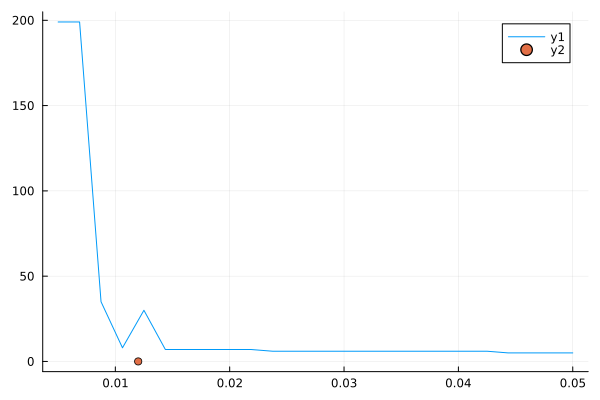

In [10]:
plot(γRange,tot_iters)
scatter!([0.012],[0.012])